####Aluno: Arthur Pinheiro Nascimento
####DRE: 121122575


---

###Dados:
Usarei dados obtidos pelo ABraOM avaliando uma mutação genética em idosos, pelo PCA poderei dizer quais idosos tem mutações parecidas, o que poderia facilitar a identificação de padrões dos efeitos das mutações nas pessoas.



In [ ]:
#Bibliotecas utilizadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
#Ler apenas as colunas numéricas do arquivo CSV
genes = pd.read_csv("ABraOM.csv").select_dtypes(include=['number'])

#Escolhendo as colunas relevantes
dropped = ["ALT1 Freq",  "ALT2 Freq",  "ALT3 Freq",  "ALT4 Freq",  "ALT5 Freq", "Allele Freq (Any ALT)","Chr" ]
genes = genes.drop(columns=dropped)
genes

,Start position,ALT1 Hmzg,ALT2 Hmzg,ALT3 Hmzg,ALT4 Hmzg,ALT5 Hmzg,Allele Number,Allele Count (Any ALT)
0,29940625,10,0,0,0,0,2330,75
1,29940631,5,0,0,0,0,2330,57
2,29940638,24,0,0,0,0,2330,236
3,29940649,122,0,0,0,0,2330,716
4,29940650,0,0,0,0,0,2330,2
...,...,...,...,...,...,...,...,...
2074,29726559,48,12,179,0,0,2330,1301
2075,31354432,47,4,39,0,0,2314,901
2076,31354443,55,1,31,6,0,2314,899
2077,31356759,18,6,201,86,0,2314,1459


##Metodologia
Utilizando PCA vai ser possível observar clusters nos dados, sendo possível observar os efeitos das mutações genéticas

---
Os passos para fazer o PCA são:

1.Padronização dos dados:
O primeiro passo é padronizar os dados, garantindo que todas as variáveis tenham média zero e desvio padrão igual a um. Isso é importante para que todas as variáveis tenham a mesma escala e não haja distorções na análise devido às unidades de medida.


2.Cálculo da matriz de covariância:
Em seguida, é calculada a matriz de covariância dos dados padronizados. A matriz de covariância é uma medida da relação linear entre as variáveis. Ela fornece informações sobre como as variáveis se movem juntas ou separadamente.

3.Cálculo dos autovetores e autovalores:
O PCA envolve a decomposição da matriz de covariância em autovetores e autovalores. Os autovetores representam a direção dos eixos principais dos dados, enquanto os autovalores representam a variância explicada ao longo dessas direções.


4.Seleção dos componentes principais:
Os autovetores são ordenados de acordo com seus autovalores correspondentes, em ordem decrescente. Os autovetores com os maiores autovalores explicam a maior parte da variância nos dados. Portanto, você pode selecionar os primeiros N autovetores (componentes principais) que explicam uma porcentagem significativa da variância total, geralmente definida pelo usuário.


5.Transformação dos dados:
Os componentes principais selecionados são usados para transformar os dados originais em um novo espaço de características. Cada observação nos dados originais é projetada no espaço dos componentes principais, resultando em um conjunto de dados de menor dimensionalidade.


6.Análise e interpretação:
Os componentes principais podem ser analisados para entender quais variáveis originais contribuem mais para cada componente. Isso pode ajudar a interpretar o significado dos componentes principais em termos das variáveis originais.


7.Redução de dimensionalidade:
A principal aplicação do PCA é a redução de dimensionalidade. Uma vez que os dados foram transformados no espaço dos componentes principais, você pode optar por reter apenas os primeiros K componentes principais, onde K é menor do que o número original de variáveis. Isso reduz a dimensionalidade dos dados, facilitando a visualização e a análise.




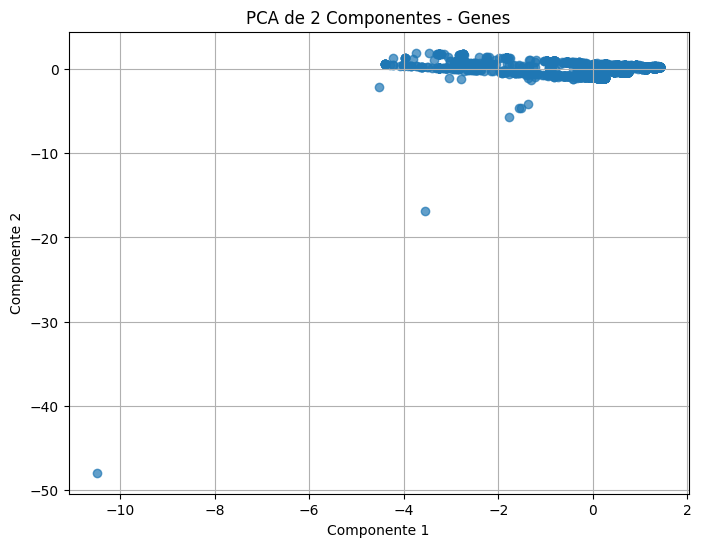

In [ ]:
# Passo 1: Padronize os dados
scaler = StandardScaler()
genes_scaled = scaler.fit_transform(genes)

# Passo 2: Calcule a matriz de covariância
cov_matrix = np.cov(genes_scaled, rowvar=False)

# Passo 3: Calcule os autovetores e autovalores da matriz de covariância
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Ordene os autovetores pelos autovalores em ordem decrescente
sorted_indices = eigenvalues.argsort()[::-1]
eigenvectors = eigenvectors[:, sorted_indices]

# Passo 4: Escolha os primeiros 2 autovetores como componentes principais
n_components = 2
top_eigenvectors = eigenvectors[:, :n_components]

# Passo 5: Projete os dados nos componentes principais
principal_components = np.dot(genes_scaled, top_eigenvectors)

# Converta os componentes principais em um DataFrame
genes_principal = pd.DataFrame(data=principal_components, columns=['Componente 1', 'Componente 2'])

# Passo 6: Plote os pontos nos componentes principais
plt.figure(figsize=(8, 6))
plt.scatter(genes_principal['Componente 1'], genes_principal['Componente 2'], alpha=0.7)
plt.title('PCA de 2 Componentes - Genes')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.grid()
plt.show()

##Problema
Pelo gráfico é bem notável que alguns pontos 'outliers' estão prejudicando a visualização dos cluster, então criarei uma função para removê-los utilizando conceitos da estatística.

In [ ]:
#Função para remover outlier de um DataFrame
#A função calcula os limites dentro do interfalo de confiança e remove os pontos
#que estão abaixo ou acima do intervalo
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

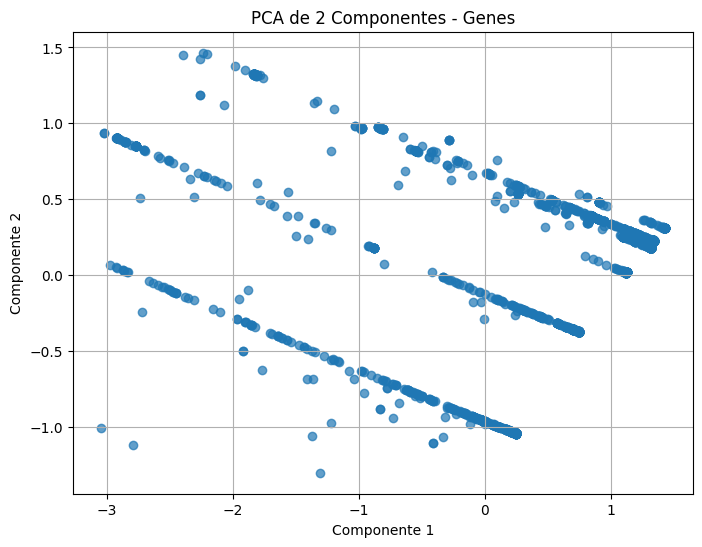

In [ ]:
genes_principal = remove_outliers_iqr(genes_principal, ['Componente 1', 'Componente 2'])

#Plotando os pontos, agora sem os outliers
plt.figure(figsize=(8, 6))
plt.scatter(genes_principal['Componente 1'], genes_principal['Componente 2'], alpha=0.7)
plt.title('PCA de 2 Componentes - Genes')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.grid()
plt.show()

#Conclusão
É possível observar que há 3 clusters principais, essas pessoas podem ser identificadas e seus sintomas analisados para reconhecer padrões

In [ ]:
# Passo 1: Padronize os dados
scaler = StandardScaler()
genes_scaled = scaler.fit_transform(genes)

# Passo 2: Aplique o PCA com 2 componentes
pca = PCA(n_components=2)
principal_components = pca.fit_transform(genes_scaled)

# Porcentagem da variância explicada por cada componente principal
explained_variance_ratio = pca.explained_variance_ratio_

# Exibir a porcentagem da variância explicada por cada componente
for i, ratio in enumerate(explained_variance_ratio):
    print(f'Porcentagem de variância pelo Componente {i + 1}: {ratio:.2%}')

Porcentagem de variância pelo Componente 1: 28.62%
Porcentagem de variância pelo Componente 2: 24.94%


#Referências


*   https://www.youtube.com/watch?v=FgakZw6K1QQ
*   http://profs.ic.uff.br/~aconci/PCA-ACP.pdf
*   https://abraom.ib.usp.br/hlasearch.php
*   Códigos com ajuda de ChatGPT

